<a href="https://colab.research.google.com/github/SuperSupermoon/Automatic-stenosis-recognition-from-CAG/blob/main/koSAIM2022_Mortality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIMIC demo Dataset downlod

In [ ]:
#Demo dataset download
!wget https://www.dropbox.com/s/akp9alsb90al94i/ICUSTAYS.csv
!wget https://www.dropbox.com/s/hc9tov37gjnoux8/CHARTEVENTS.csv
!wget https://www.dropbox.com/s/9xliua9uzb6mdp9/ADMISSIONS.csv

In [ ]:
# Full dataset preprocessed numpy download
!wget https://www.dropbox.com/s/6cbfqgq1ya9hxy9/X_train.npy
!wget https://www.dropbox.com/s/66uky8qzebgh6ws/X_test.npy
!wget https://www.dropbox.com/s/lndvvajkf1ysawn/y_test.npy
!wget https://www.dropbox.com/s/xf5sc3ivt6qnv3h/y_train.npy

In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings( 'ignore' )

In [ ]:
os.getcwd()

'/content'

In [ ]:
!nvidia-smi

Wed Aug 10 15:48:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Table ICUSTAY

In [ ]:
df_icu = pd.read_csv('./ICUSTAYS.csv')
df_icu
print('ICUSTAYS file is loaded !')
'''
ICUSTAY ->  HADM_ID / ICUSTAY_ID / INTIME / OUTTIME / LOS
'''

ICUSTAYS file is loaded !


'\nICUSTAY ->  HADM_ID / ICUSTAY_ID / INTIME / OUTTIME / LOS\n'

In [ ]:
df_icu.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,12742,10006,142345,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10,2164-10-25 12:21,1.6325
1,12747,10011,105331,232110,carevue,MICU,MICU,15,15,2126-08-14 22:34,2126-08-28 18:59,13.8507
2,12749,10013,165520,264446,carevue,MICU,MICU,15,15,2125-10-04 23:38,2125-10-07 15:13,2.6499
3,12754,10017,199207,204881,carevue,CCU,CCU,7,7,2149-05-29 18:52,2149-05-31 22:19,2.1436
4,12755,10019,177759,228977,carevue,MICU,MICU,15,15,2163-05-14 20:43,2163-05-16 3:47,1.2938


# Table ADMISSION

In [ ]:
df_add = pd.read_csv('./ADMISSIONS.csv')

print('ADMISSION file is loaded !')
'''
ADMISSION ->  HADM_ID / ADMITTIME / DSCHTIME /  DEATHTIME  /  ADDMISSION_TYPE   
'''

ADMISSION file is loaded !


'\nADMISSION ->  HADM_ID / ADMITTIME / DSCHTIME /  DEATHTIME  /  ADDMISSION_TYPE   \n'

In [ ]:
df_add.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,12258,10006,142345,2164-10-23 21:09,2164-11-01 17:15,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43,2164-10-23 23:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32,2126-08-28 18:59,2126-08-28 18:59,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36,2125-10-07 15:13,2125-10-07 15:13,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19,2149-06-03 18:42,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08,2149-05-26 19:45,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43,2163-05-15 12:00,2163-05-15 12:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


# Table CHARTTIME

In [ ]:
print('It takes about 10mins for loading CHARTEVENT files ...better to grap a cup of coffee now....')
df_char = pd.read_csv('./CHARTEVENTS.csv')
print('CHARTTIME loading is finished !')

It takes about 10mins for loading CHARTEVENT files ...better to grap a cup of coffee now....
CHARTTIME loading is finished !


In [ ]:
df_char.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,5279021,40124,126179,279554.0,223761,2130-02-04 4:00,2130-02-04 4:35,19085,95.9,95.9,?F,0.0,0.0,NaN,NaN
1,5279022,40124,126179,279554.0,224695,2130-02-04 4:25,2130-02-04 5:55,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,NaN,NaN
2,5279023,40124,126179,279554.0,220210,2130-02-04 4:30,2130-02-04 4:43,21452,15.0,15.0,insp/min,0.0,0.0,NaN,NaN
3,5279024,40124,126179,279554.0,220045,2130-02-04 4:32,2130-02-04 4:43,21452,94.0,94.0,bpm,0.0,0.0,NaN,NaN
4,5279025,40124,126179,279554.0,220179,2130-02-04 4:32,2130-02-04 4:43,21452,163.0,163.0,mmHg,0.0,0.0,NaN,NaN


In [ ]:
'''
ICUSTAY ->  HADM_ID / ICUSTAY_ID / INTIME / OUTTIME / LOS
ADMISSION ->  HADM_ID / ADMITTIME / DSCHTIME /  DEATHTIME  /   
CARTTIME -> ICUSTAY_ID / ITEMID /  CHARTTIME  /  WARNING / ERROR / STOPPED /  
'''

'\nICUSTAY ->  HADM_ID / ICUSTAY_ID / INTIME / OUTTIME / LOS\nADMISSION ->  HADM_ID / ADMITTIME / DSCHTIME /  DEATHTIME  /   \nCARTTIME -> ICUSTAY_ID / ITEMID /  CHARTTIME  /  WARNING / ERROR / STOPPED /  \n'

# Preprocess

In [ ]:
#조건 : 입원 기간 (Length of stay - LOS) 1day 이상 2day 이하 
#     : ICU 입원 후 3 시간 내에 있는 정보만 사용
#     : 최대 100개의 이벤트까지 사용 가능
#      : ICUSTAY ID  제일 끝번호가 8, 9 로 끝나는 환자는 test set 그 외는 train set 으로 사용

In [ ]:
df_icu.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,12742,10006,142345,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10,2164-10-25 12:21,1.6325
1,12747,10011,105331,232110,carevue,MICU,MICU,15,15,2126-08-14 22:34,2126-08-28 18:59,13.8507
2,12749,10013,165520,264446,carevue,MICU,MICU,15,15,2125-10-04 23:38,2125-10-07 15:13,2.6499
3,12754,10017,199207,204881,carevue,CCU,CCU,7,7,2149-05-29 18:52,2149-05-31 22:19,2.1436
4,12755,10019,177759,228977,carevue,MICU,MICU,15,15,2163-05-14 20:43,2163-05-16 3:47,1.2938


In [ ]:
#ICU_STAY   1=<LOS <=2   
print('Length of stay filter for ICUSTAYS ...')
df_icu_los = df_icu[(df_icu['LOS']>=1) & (df_icu['LOS']<=2)]

Length of stay filter for ICUSTAYS ...


In [ ]:
df_icu_los.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,12742,10006,142345,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10,2164-10-25 12:21,1.6325
4,12755,10019,177759,228977,carevue,MICU,MICU,15,15,2163-05-14 20:43,2163-05-16 3:47,1.2938
9,12768,10033,157235,254543,carevue,SICU,SICU,33,33,2132-12-05 13:13,2132-12-06 14:53,1.0695
10,12770,10035,110244,296804,carevue,SICU,SICU,23,23,2129-03-04 13:40,2129-03-05 22:40,1.3755
11,12771,10036,189483,227834,carevue,MICU,MICU,12,12,2185-03-24 16:57,2185-03-26 12:18,1.8068


In [ ]:
print(df_icu.shape)
print(df_icu_los.shape)

(136, 12)
(41, 12)


In [ ]:
# ADMISSION HADM ID filter following LOS filtered ICUSTAYS HADM_ID
print('HADM_ID filter on admission file...')
df_add = df_add[df_add['HADM_ID'].isin(df_icu_los['HADM_ID'].unique())]

HADM_ID filter on admission file...


In [ ]:
print('merge ICUSTAYS and ADMISSION')
df_icu_add = pd.merge(df_icu_los, df_add[['HADM_ID','ADMITTIME','DISCHTIME','DEATHTIME', 'ADMISSION_TYPE']], how='left', on='HADM_ID')

merge ICUSTAYS and ADMISSION


In [ ]:
print(df_add.columns)
print(df_icu_los.columns)
print(df_icu_add.columns)

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')
Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'DBSOURCE',
       'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID',
       'INTIME', 'OUTTIME', 'LOS'],
      dtype='object')
Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'DBSOURCE',
       'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID',
       'INTIME', 'OUTTIME', 'LOS', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME',
       'ADMISSION_TYPE'],
      dtype='object')


In [ ]:
df_icu_add.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE
0,12742,10006,142345,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10,2164-10-25 12:21,1.6325,2164-10-23 21:09,2164-11-01 17:15,NaN,EMERGENCY
1,12755,10019,177759,228977,carevue,MICU,MICU,15,15,2163-05-14 20:43,2163-05-16 3:47,1.2938,2163-05-14 20:43,2163-05-15 12:00,2163-05-15 12:00,EMERGENCY
2,12768,10033,157235,254543,carevue,SICU,SICU,33,33,2132-12-05 13:13,2132-12-06 14:53,1.0695,2132-12-05 2:46,2132-12-08 15:15,NaN,EMERGENCY
3,12770,10035,110244,296804,carevue,SICU,SICU,23,23,2129-03-04 13:40,2129-03-05 22:40,1.3755,2129-03-03 16:06,2129-03-07 18:19,NaN,ELECTIVE
4,12771,10036,189483,227834,carevue,MICU,MICU,12,12,2185-03-24 16:57,2185-03-26 12:18,1.8068,2185-03-24 16:56,2185-03-26 9:15,2185-03-26 9:15,EMERGENCY


In [ ]:
df_icu_add[['INTIME','OUTTIME','DEATHTIME']].head()

,INTIME,OUTTIME,DEATHTIME
0,2164-10-23 21:10,2164-10-25 12:21,NaN
1,2163-05-14 20:43,2163-05-16 3:47,2163-05-15 12:00
2,2132-12-05 13:13,2132-12-06 14:53,NaN
3,2129-03-04 13:40,2129-03-05 22:40,NaN
4,2185-03-24 16:57,2185-03-26 12:18,2185-03-26 9:15


In [ ]:
print('Time data to "datetime" type ')
time_cols = ['INTIME','OUTTIME','DEATHTIME']
for col_name in time_cols: 
    df_icu_add[col_name] = pd.to_datetime(df_icu_add[col_name])
print('y label live = 0  death = 1')

Time data to "datetime" type 
y label live = 0  death = 1


In [ ]:
df_icu_add[['INTIME','OUTTIME','DEATHTIME']].head()

,INTIME,OUTTIME,DEATHTIME
0,2164-10-23 21:10:00,2164-10-25 12:21:00,NaT
1,2163-05-14 20:43:00,2163-05-16 03:47:00,2163-05-15 12:00:00
2,2132-12-05 13:13:00,2132-12-06 14:53:00,NaT
3,2129-03-04 13:40:00,2129-03-05 22:40:00,NaT
4,2185-03-24 16:57:00,2185-03-26 12:18:00,2185-03-26 09:15:00


In [ ]:
df_icu_add.reset_index(inplace=True)
df_icu_add['y'] = pd.Series(list(np.zeros(len(df_icu_add))))

In [ ]:
df_icu_add.head()

,index,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,y
0,0,12742,10006,142345,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10:00,2164-10-25 12:21:00,1.6325,2164-10-23 21:09,2164-11-01 17:15,NaT,EMERGENCY,0.0
1,1,12755,10019,177759,228977,carevue,MICU,MICU,15,15,2163-05-14 20:43:00,2163-05-16 03:47:00,1.2938,2163-05-14 20:43,2163-05-15 12:00,2163-05-15 12:00:00,EMERGENCY,0.0
2,2,12768,10033,157235,254543,carevue,SICU,SICU,33,33,2132-12-05 13:13:00,2132-12-06 14:53:00,1.0695,2132-12-05 2:46,2132-12-08 15:15,NaT,EMERGENCY,0.0
3,3,12770,10035,110244,296804,carevue,SICU,SICU,23,23,2129-03-04 13:40:00,2129-03-05 22:40:00,1.3755,2129-03-03 16:06,2129-03-07 18:19,NaT,ELECTIVE,0.0
4,4,12771,10036,189483,227834,carevue,MICU,MICU,12,12,2185-03-24 16:57:00,2185-03-26 12:18:00,1.8068,2185-03-24 16:56,2185-03-26 9:15,2185-03-26 09:15:00,EMERGENCY,0.0


In [ ]:
df_icu_add.loc[df_icu_add['DEATHTIME'] <= df_icu_add['INTIME'],'y']=2 #DEATHTIME early than INTIME -> y label 2  will be delted later
df_icu_add.loc[(df_icu_add['DEATHTIME'] >=df_icu_add['INTIME']) & (df_icu_add['DEATHTIME']<=df_icu_add['OUTTIME']),'y']=1
print(df_icu_add['y'].value_counts())

0.0    37
1.0     4
Name: y, dtype: int64


In [ ]:
df_icu_add = df_icu_add[df_icu_add['y']!=2]

In [ ]:
df_icu_add.head()

,index,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,y
0,0,12742,10006,142345,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10:00,2164-10-25 12:21:00,1.6325,2164-10-23 21:09,2164-11-01 17:15,NaT,EMERGENCY,0.0
1,1,12755,10019,177759,228977,carevue,MICU,MICU,15,15,2163-05-14 20:43:00,2163-05-16 03:47:00,1.2938,2163-05-14 20:43,2163-05-15 12:00,2163-05-15 12:00:00,EMERGENCY,1.0
2,2,12768,10033,157235,254543,carevue,SICU,SICU,33,33,2132-12-05 13:13:00,2132-12-06 14:53:00,1.0695,2132-12-05 2:46,2132-12-08 15:15,NaT,EMERGENCY,0.0
3,3,12770,10035,110244,296804,carevue,SICU,SICU,23,23,2129-03-04 13:40:00,2129-03-05 22:40:00,1.3755,2129-03-03 16:06,2129-03-07 18:19,NaT,ELECTIVE,0.0
4,4,12771,10036,189483,227834,carevue,MICU,MICU,12,12,2185-03-24 16:57:00,2185-03-26 12:18:00,1.8068,2185-03-24 16:56,2185-03-26 9:15,2185-03-26 09:15:00,EMERGENCY,1.0


In [ ]:
df_icu_add['fold']=0
print('Test index for last ICUSTAY_ID number is 8 or 9')
test_index = (df_icu_add['ICUSTAY_ID'].astype(str).map(lambda x : x[-1]) == '8') |(df_icu_add['ICUSTAY_ID'].astype(str).map(lambda x : x[-1]) == '9')
df_icu_add.loc[test_index, 'fold'] = 1
print('Fold 1 -> train set  Fold 0 -> test set')
print(df_icu_add['fold'].value_counts())

Test index for last ICUSTAY_ID number is 8 or 9
Fold 1 -> train set  Fold 0 -> test set
0    35
1     6
Name: fold, dtype: int64


In [ ]:
df_char_icu = df_char[df_char['ICUSTAY_ID'].isin(df_icu_add['ICUSTAY_ID'].values)]

In [ ]:
df_char_icu

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
1791,5295815,40177,198480,236120.0,220045,2169-05-06 23:17,2169-05-06 23:44,19152,86.0,86.0,bpm,0.0,0.0,NaN,NaN
1792,5295816,40177,198480,236120.0,220210,2169-05-06 23:17,2169-05-06 23:44,19152,16.0,16.0,insp/min,0.0,0.0,NaN,NaN
1793,5295817,40177,198480,236120.0,220277,2169-05-06 23:19,2169-05-06 23:44,19152,98.0,98.0,%,0.0,0.0,NaN,NaN
1794,5295818,40177,198480,236120.0,220045,2169-05-06 23:43,2169-05-06 23:43,19152,74.0,74.0,bpm,0.0,0.0,NaN,NaN
1795,5295819,40177,198480,236120.0,220046,2169-05-06 23:43,2169-05-06 23:44,19152,120.0,120.0,bpm,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755326,274489370,44222,192189,238186.0,226381,2180-07-20 14:48,2180-07-20 14:48,20889,Single,1.0,NaN,0.0,0.0,NaN,NaN
755327,274489371,44222,192189,238186.0,226543,2180-07-20 14:48,2180-07-20 14:48,20889,Roman Catholic,13.0,NaN,0.0,0.0,NaN,NaN
755328,274489372,44222,192189,238186.0,226544,2180-07-20 14:48,2180-07-20 14:48,20889,English,1.0,NaN,0.0,0.0,NaN,NaN
755329,274489373,44222,192189,238186.0,226545,2180-07-20 14:48,2180-07-20 14:48,20889,White,NaN,NaN,0.0,0.0,NaN,NaN


In [ ]:
df_char_icu[['CHARTTIME','STOPPED','WARNING','ERROR']].head()

,CHARTTIME,STOPPED,WARNING,ERROR
1791,2169-05-06 23:17,NaN,0.0,0.0
1792,2169-05-06 23:17,NaN,0.0,0.0
1793,2169-05-06 23:19,NaN,0.0,0.0
1794,2169-05-06 23:43,NaN,0.0,0.0
1795,2169-05-06 23:43,NaN,0.0,0.0


In [ ]:
print('STOPPED value_counts', df_char_icu.STOPPED.value_counts())
print('WARNING value_counts', df_char_icu.WARNING.value_counts())
print('ERROR value_counts', df_char_icu.ERROR.value_counts())

STOPPED value_counts NotStopd    20139
D/C'd         113
Name: STOPPED, dtype: int64
WARNING value_counts 0.0    35778
1.0      791
Name: WARNING, dtype: int64
ERROR value_counts 0.0    36545
1.0       24
Name: ERROR, dtype: int64


In [ ]:
df_char_icu['CHARTTIME'] = pd.to_datetime(df_char_icu['CHARTTIME'])

In [ ]:
# Filter CHARRTIME < 3h ours from INTIME

In [ ]:
print(df_char_icu.columns)
print(df_icu_add.columns)
df_char_icu['ICUSTAY_ID']

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID', 'CHARTTIME',
       'STORETIME', 'CGID', 'VALUE', 'VALUENUM', 'VALUEUOM', 'WARNING',
       'ERROR', 'RESULTSTATUS', 'STOPPED'],
      dtype='object')
Index(['index', 'ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'DBSOURCE',
       'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID',
       'INTIME', 'OUTTIME', 'LOS', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME',
       'ADMISSION_TYPE', 'y', 'fold'],
      dtype='object')


1791      236120.0
1792      236120.0
1793      236120.0
1794      236120.0
1795      236120.0
            ...   
755326    238186.0
755327    238186.0
755328    238186.0
755329    238186.0
755330    238186.0
Name: ICUSTAY_ID, Length: 56999, dtype: float64

In [ ]:
df_char_icu= pd.merge(df_char_icu, df_icu_add[['ICUSTAY_ID','INTIME']], how='left', on='ICUSTAY_ID')

In [ ]:
print(df_char_icu.columns)
df_char_icu['ICUSTAY_ID']

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID', 'CHARTTIME',
       'STORETIME', 'CGID', 'VALUE', 'VALUENUM', 'VALUEUOM', 'WARNING',
       'ERROR', 'RESULTSTATUS', 'STOPPED', 'INTIME'],
      dtype='object')


0        236120.0
1        236120.0
2        236120.0
3        236120.0
4        236120.0
           ...   
56994    238186.0
56995    238186.0
56996    238186.0
56997    238186.0
56998    238186.0
Name: ICUSTAY_ID, Length: 56999, dtype: float64

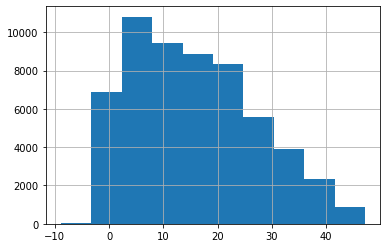

In [ ]:
# historgram for item time offset from INTTIME
((df_char_icu['CHARTTIME'] - df_char_icu['INTIME']).dt.total_seconds()/(60*60)).hist()

In [ ]:
hours_index=((df_char_icu['CHARTTIME'] - df_char_icu['INTIME']).dt.total_seconds()/(60*60))<=3
intime_index = (df_char_icu['CHARTTIME'] >=df_char_icu['INTIME'])

In [ ]:
df_char_icu = df_char_icu[hours_index & intime_index]

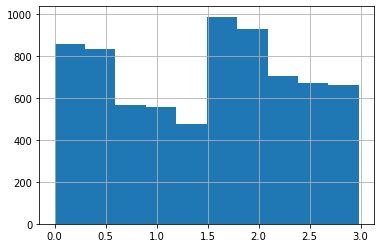

In [ ]:
#After filter charttime
((df_char_icu['CHARTTIME'] - df_char_icu['INTIME']).dt.total_seconds()/(60*60)).hist()

In [ ]:
df_char_icu

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED,INTIME
0,5295815,40177,198480,236120.0,220045,2169-05-06 23:17:00,2169-05-06 23:44,19152,86.0,86.0,bpm,0.0,0.0,NaN,NaN,2169-05-06 23:17:00
1,5295816,40177,198480,236120.0,220210,2169-05-06 23:17:00,2169-05-06 23:44,19152,16.0,16.0,insp/min,0.0,0.0,NaN,NaN,2169-05-06 23:17:00
2,5295817,40177,198480,236120.0,220277,2169-05-06 23:19:00,2169-05-06 23:44,19152,98.0,98.0,%,0.0,0.0,NaN,NaN,2169-05-06 23:17:00
3,5295818,40177,198480,236120.0,220045,2169-05-06 23:43:00,2169-05-06 23:43,19152,74.0,74.0,bpm,0.0,0.0,NaN,NaN,2169-05-06 23:17:00
4,5295819,40177,198480,236120.0,220046,2169-05-06 23:43:00,2169-05-06 23:44,19152,120.0,120.0,bpm,0.0,0.0,NaN,NaN,2169-05-06 23:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56516,274488892,44222,192189,238186.0,225099,2180-07-19 09:36:00,2180-07-19 9:39,15029,Intact,NaN,NaN,0.0,0.0,NaN,NaN,2180-07-19 06:56:00
56517,274488893,44222,192189,238186.0,225101,2180-07-19 09:36:00,2180-07-19 9:39,15029,No,NaN,NaN,0.0,0.0,NaN,NaN,2180-07-19 06:56:00
56518,274488894,44222,192189,238186.0,225120,2180-07-19 09:36:00,2180-07-19 9:39,15029,Good,NaN,NaN,0.0,0.0,NaN,NaN,2180-07-19 06:56:00
56519,274488895,44222,192189,238186.0,225131,2180-07-19 09:36:00,2180-07-19 9:39,15029,Patient,NaN,NaN,0.0,0.0,NaN,NaN,2180-07-19 06:56:00


In [ ]:
df_char_icu.groupby(['ICUSTAY_ID']).head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED,INTIME
0,5295815,40177,198480,236120.0,220045,2169-05-06 23:17:00,2169-05-06 23:44,19152,86.0,86.0,bpm,0.0,0.0,NaN,NaN,2169-05-06 23:17:00
1,5295816,40177,198480,236120.0,220210,2169-05-06 23:17:00,2169-05-06 23:44,19152,16.0,16.0,insp/min,0.0,0.0,NaN,NaN,2169-05-06 23:17:00
2,5295817,40177,198480,236120.0,220277,2169-05-06 23:19:00,2169-05-06 23:44,19152,98.0,98.0,%,0.0,0.0,NaN,NaN,2169-05-06 23:17:00
3,5295818,40177,198480,236120.0,220045,2169-05-06 23:43:00,2169-05-06 23:43,19152,74.0,74.0,bpm,0.0,0.0,NaN,NaN,2169-05-06 23:17:00
4,5295819,40177,198480,236120.0,220046,2169-05-06 23:43:00,2169-05-06 23:44,19152,120.0,120.0,bpm,0.0,0.0,NaN,NaN,2169-05-06 23:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22490,86362656,10130,156668,241562.0,211,2161-02-04 21:30:00,2161-02-04 21:33,15690,123,123.0,BPM,NaN,NaN,NaN,NotStopd,2161-02-04 21:06:00
22491,86362657,10130,156668,241562.0,618,2161-02-04 21:30:00,2161-02-04 21:33,15690,10,10.0,BPM,NaN,NaN,NaN,NotStopd,2161-02-04 21:06:00
22492,86362658,10130,156668,241562.0,646,2161-02-04 21:30:00,2161-02-04 21:33,15690,98,98.0,%,NaN,NaN,NaN,NotStopd,2161-02-04 21:06:00
22493,86362659,10130,156668,241562.0,742,2161-02-04 21:30:00,2161-02-04 21:33,15690,1,1.0,kg,NaN,NaN,NaN,NotStopd,2161-02-04 21:06:00


In [ ]:
print('Make list for each ICUSTAY_ID')
df_char_icu = (df_char_icu.groupby(['ICUSTAY_ID'])).agg({'ITEMID': lambda x: x.tolist()})
df_char_icu.head()

Make list for each ICUSTAY_ID


,ITEMID
ICUSTAY_ID,
201204.0,"[220045, 220210, 220277, 220045, 220179, 22018..."
205589.0,"[128, 211, 456, 618, 646, 677, 678, 742, 1125,..."
206504.0,"[69, 762, 916, 917, 919, 920, 924, 925, 926, 9..."
210164.0,"[223761, 220045, 220210, 224562, 224563, 22484..."
214180.0,"[220046, 220047, 223751, 223752, 223761, 22376..."


In [ ]:
max_len = 100

In [ ]:
def padding(x):
    pad = np.zeros(max_len-len(x))
    x.extend(pad)
    return x

In [ ]:
df_char_icu['ITEMID'] = df_char_icu['ITEMID'].map(lambda x: x[:max_len] if len(x) > max_len else padding(x))

In [ ]:
df_char_icu['ITEMID']

ICUSTAY_ID
201204.0    [220045, 220210, 220277, 220045, 220179, 22018...
205589.0    [128, 211, 456, 618, 646, 677, 678, 742, 1125,...
206504.0    [69, 762, 916, 917, 919, 920, 924, 925, 926, 9...
210164.0    [223761, 220045, 220210, 224562, 224563, 22484...
214180.0    [220046, 220047, 223751, 223752, 223761, 22376...
214861.0    [27, 31, 77, 80, 82, 83, 84, 85, 86, 87, 88, 1...
215460.0    [128, 159, 161, 211, 212, 456, 550, 581, 618, ...
217960.0    [69, 762, 916, 917, 919, 920, 924, 925, 926, 9...
219013.0    [220045, 220210, 220179, 220180, 220181, 22027...
219307.0    [220734, 227471, 220179, 220180, 220181, 22004...
227834.0    [781, 786, 787, 788, 791, 811, 813, 814, 815, ...
228977.0    [784, 803, 804, 836, 852, 1527, 52, 77, 82, 83...
234424.0    [220179, 220180, 220181, 220045, 220046, 22004...
236120.0    [220045, 220210, 220277, 220045, 220046, 22004...
238186.0    [220210, 220045, 220045, 220210, 223834, 22017...
238399.0    [223761, 220046, 220047, 223751, 223752, 22376.

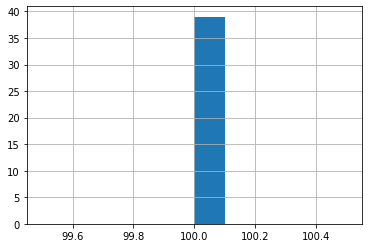

In [ ]:
#Each ICU item ID length
df_char_icu['ITEMID'].map(len).hist()

In [ ]:
# making last dataframe
df_last = pd.merge(df_char_icu, df_icu_add[['ICUSTAY_ID','y','fold','ADMISSION_TYPE']], how='left', on='ICUSTAY_ID')
df_last.shape

(39, 5)

In [ ]:
df_last.head()

,ICUSTAY_ID,ITEMID,y,fold,ADMISSION_TYPE
0,201204.0,"[220045, 220210, 220277, 220045, 220179, 22018...",0.0,0,EMERGENCY
1,205589.0,"[128, 211, 456, 618, 646, 677, 678, 742, 1125,...",0.0,1,EMERGENCY
2,206504.0,"[69, 762, 916, 917, 919, 920, 924, 925, 926, 9...",0.0,0,EMERGENCY
3,210164.0,"[223761, 220045, 220210, 224562, 224563, 22484...",0.0,0,EMERGENCY
4,214180.0,"[220046, 220047, 223751, 223752, 223761, 22376...",0.0,0,EMERGENCY


In [ ]:
a = [items for items in df_last['ITEMID']]
print(a[0])

[220045, 220210, 220277, 220045, 220179, 220180, 220181, 220210, 220277, 223834, 220046, 220047, 223751, 223752, 223769, 223770, 224161, 224162, 226253, 226531, 220274, 223679, 225667, 225668, 226062, 226063, 220045, 220179, 220180, 220181, 220210, 220277, 220045, 220179, 220180, 220181, 220210, 220277, 220045, 220179, 220180, 220181, 220210, 220277, 220734, 227471, 226531, 226512, 226707, 226730, 226113, 227293, 225185, 225187, 224168, 224641, 226113, 227293, 226113, 224564, 225187, 224080, 224082, 224084, 224085, 224086, 224093, 224281, 226381, 226543, 226544, 227378, 220048, 220739, 223753, 223754, 223898, 223900, 223901, 223902, 223903, 223907, 223910, 223911, 223916, 223917, 223918, 223919, 223920, 223934, 223935, 223936, 223938, 223939, 223943, 223944, 223947, 223948, 223949, 223951]


In [ ]:
codes_unique = [item for items in df_last['ITEMID'] for item in items]
print(len(codes_unique))
print(len(set(codes_unique)))

3900
589


In [ ]:
codes_unique = [item for items in df_last['ITEMID'] for item in items]
vocab = dict(zip(set(codes_unique), range(1,len(set(codes_unique))+1))) # 0 for pad
print('vocab size is .. ', len(vocab))
item_index = pd.Series([list(pd.Series(codes).map(vocab)) for codes in df_last['ITEMID']])
df_last['item_index'] = item_index

vocab size is ..  589


In [ ]:
df_last

,ICUSTAY_ID,ITEMID,y,fold,ADMISSION_TYPE,item_index
0,201204.0,"[220045, 220210, 220277, 220045, 220179, 22018...",0.0,0,EMERGENCY,"[372, 416, 429, 372, 409, 410, 411, 416, 429, ..."
1,205589.0,"[128, 211, 456, 618, 646, 677, 678, 742, 1125,...",0.0,1,EMERGENCY,"[49, 90, 156, 217, 231, 250, 253, 282, 424, 47..."
2,206504.0,"[69, 762, 916, 917, 919, 920, 924, 925, 926, 9...",0.0,0,EMERGENCY,"[31, 295, 378, 379, 381, 382, 386, 387, 388, 3..."
3,210164.0,"[223761, 220045, 220210, 224562, 224563, 22484...",0.0,0,EMERGENCY,"[179, 372, 416, 446, 447, 509, 429, 409, 410, ..."
4,214180.0,"[220046, 220047, 223751, 223752, 223761, 22376...",0.0,0,EMERGENCY,"[373, 374, 171, 172, 179, 183, 184, 391, 392, ..."
5,214861.0,"[27, 31, 77, 80, 82, 83, 84, 85, 86, 87, 88, 1...",0.0,0,EMERGENCY,"[12, 13, 33, 35, 36, 37, 38, 39, 40, 41, 42, 4..."
6,215460.0,"[128, 159, 161, 211, 212, 456, 550, 581, 618, ...",0.0,0,EMERGENCY,"[49, 68, 69, 90, 91, 156, 189, 201, 217, 231, ..."
7,217960.0,"[69, 762, 916, 917, 919, 920, 924, 925, 926, 9...",0.0,0,EMERGENCY,"[31, 295, 378, 379, 381, 382, 386, 387, 388, 3..."
8,219013.0,"[220045, 220210, 220179, 220180, 220181, 22027...",0.0,0,EMERGENCY,"[372, 416, 409, 410, 411, 429, 373, 374, 171, ..."
9,219307.0,"[220734, 227471, 220179, 220180, 220181, 22004...",0.0,0,EMERGENCY,"[507, 61, 409, 410, 411, 373, 374, 171, 172, 1..."


In [ ]:
print('Split by fold ... fold = 0 -> train   fold = 1 -> test')
X_train = np.array(df_last[df_last['fold']==0]['item_index'].to_list()).astype('int16')
X_test = np.array(df_last[df_last['fold']==1]['item_index'].to_list()).astype('int16')
y_train = np.array(df_last[df_last['fold']==0]['y']).astype('int16')
y_test = np.array(df_last[df_last['fold']==1]['y']).astype('int16')

Split by fold ... fold = 0 -> train   fold = 1 -> test


In [ ]:
print('X_train total numbers : ',len(X_train) )
print('X_test total numbers : ',len(X_test) )
print('y_train total numbers : ',len(y_train), '  train y label ==1  : ',sum(y_train ==1), '  train y label== 0  : ', sum(y_train ==0))
print('y_test total numbers : ',len(y_test), '  test y label ==1  : ', sum(y_test ==1), '  test y label== 0  : ', sum(y_test ==0))

X_train total numbers :  33
X_test total numbers :  6
y_train total numbers :  33   train y label ==1  :  3   train y label== 0  :  30
y_test total numbers :  6   test y label ==1  :  1   test y label== 0  :  5


In [ ]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

In [ ]:
print('Save numpy input files !')
np.save('X_train_demo.npy', X_train)
np.save('X_test_demo.npy', X_test)
np.save('y_train_demo.npy', y_train)
np.save('y_test_demo.npy', y_test)

Save numpy input files !


# Model pipline

In [ ]:
del df_icu, df_add, df_char

In [ ]:
X_train = np.load('./X_train.npy')
y_train = np.load('./y_train.npy')
X_test = np.load('./X_test.npy')
y_test = np.load('./y_test.npy')

In [ ]:
X_train

array([[1763, 1893, 1971, ...,  806,  807,  813],
       [1151, 1845, 2163, ..., 1088, 1089, 1090],
       [ 477,  507,  529, ...,  828, 2201,   38],
       ...,
       [ 113,  115,  164, ...,  510,  511,  512],
       [2211, 2212, 2213, ..., 1004, 1005, 1014],
       [ 473,  503,  504, ...,  390,  603,  604]], dtype=int16)

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [ ]:
print('X_train total numbers : ',len(X_train) )
print('X_test total numbers : ',len(X_test) )
print('y_train total numbers : ',len(y_train), '  train y label ==1  : ', sum(y_train==1), '  train y label== 0  : ', sum(y_train==0))
print('y_test total numbers : ',len(y_train), '  test y label ==1  : ', sum(y_test==1), '  test y label== 0  : ', sum(y_test==0))

X_train total numbers :  11956
X_test total numbers :  3268
y_train total numbers :  11956   train y label ==1  :  507   train y label== 0  :  11449
y_test total numbers :  11956   test y label ==1  :  138   test y label== 0  :  3130


# Data split for evaluation set

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, random_state=2020)
for train_index, valid_index in sss.split(X_train, y_train):
    print("TRAIN:", train_index, "valid:", valid_index)
    X_train, X_valid = X_train[train_index], X_train[valid_index]
    y_train, y_valid = y_train[train_index], y_train[valid_index]
    break

TRAIN: [3174 8232 7380 ... 2864 7503 3422] valid: [10957 10503  3503 ...  1200 11460  5508]


In [ ]:
data = {'X_train' : X_train, 
           'y_train' : y_train,
           'X_valid' : X_valid,
           'y_valid' : y_valid,
           'X_test' : X_test,
           'y_test' : y_test
          }

In [ ]:
print('X_train.shape ', X_train.shape)
print('y_train.shape ', y_train.shape)
print('X_valid.shape ', X_valid.shape)
print('y_valid.shape, ', y_valid.shape)
print('X_test.shape ', X_test.shape)
print('y_test.shape ', y_test.shape)

X_train.shape  (10760, 100)
y_train.shape  (10760,)
X_valid.shape  (1196, 100)
y_valid.shape,  (1196,)
X_test.shape  (3268, 100)
y_test.shape  (3268,)


# Config

In [ ]:
import easydict

In [ ]:
config= easydict.EasyDict({'rnn_model':'LSTM',
                            'n_epoch': 10,
                            'batch_size': 32,
                            'lr':1e-4,
                           'save_dir':'./',
                           'vocab_size':2288,
                           'embed_dim' : 128,
                           'hidden_dim' : 256,
                           'n_layers' : 1,
                           'dropout' : 0.3
        })

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import roc_auc_score, average_precision_score
import tqdm

# Dataset

In [ ]:
class EHRDataset(Dataset):
    def __init__(self, data, data_type):
        
        if data_type =='train':
            self.X = data['X_train']
            self.y = data['y_train']
            
        elif data_type =='valid':
            self.X = data['X_valid']
            self.y = data['y_valid']
            
        elif data_type =='test':
            self.X = data['X_test']
            self.y = data['y_test']
                      
        assert len(self.X) ==len(self.y), "length should be same between input and label"
        
        self.X = torch.LongTensor(self.X)
        self.y = torch.Tensor(self.y)
        
    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        X = self.X[index]
        y = self.y[index]
        
        return {
                'X': X,
                'y_target': y
                }

# Model

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, config):
        super(RNNModel, self).__init__()

        self.embedding = nn.Embedding(num_embeddings=config.vocab_size, embedding_dim=config.embed_dim, padding_idx=0)
        
        if config.rnn_model =='LSTM':
            self.RNN = nn.LSTM(input_size=config.embed_dim, 
                              hidden_size=config.hidden_dim, 
                              num_layers=config.n_layers,
                              dropout=config.dropout,
                              bidirectional=False,
                              batch_first=True,
                            )
            
        elif config.rnn_model =='GRU':
             self.RNN = nn.GRU(input_size=config.embed_dim, 
                              hidden_size=config.hidden_dim, 
                              num_layers=config.n_layers,
                              dropout=config.dropout,
                              bidirectional=False,
                              batch_first=True,
                            )
            
        self.linear = nn.Linear(config.hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # (32, 100)
        x = self.embedding(x) # (32, 100,128)
        hidden, _ = self.RNN(x) # output = (B, 1, H) - last hidden , hidden = (B, S, H) - all hidden

        output = hidden[:, -1, :]
        output = self.linear(output)
        
        output = self.sigmoid(output) #(32, 1)
        output = output.squeeze(dim=1) #(32)
           
        return output # out.shape (batch, 1)
        

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
#Device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
#Dataset
train_loader = DataLoader(EHRDataset(data, data_type = 'train'), batch_size=config.batch_size, num_workers = 8, shuffle=True)
eval_loader = DataLoader(EHRDataset(data, data_type = 'valid'), batch_size=config.batch_size, num_workers = 8, shuffle=True)
test_loader = DataLoader(EHRDataset(data, data_type = 'test'), batch_size=config.batch_size, num_workers = 8, shuffle=False)

print('test dataloader total data number ', len(test_loader)*config.batch_size)
print('valid dataloader total data number ', len(eval_loader)*config.batch_size)
print('train dataloader total data number ', len(train_loader)*config.batch_size)

test dataloader total data number  3296
valid dataloader total data number  1216
train dataloader total data number  10784


In [ ]:
#Save & Load path
filename = f'Model_{config.rnn_model}_batch_{config.batch_size}_lr_{config.lr}'

output_path = os.path.join(config.save_dir, filename)
best_eval_path = output_path + '_best_auprc.pt'

print('Model will be saved in {}'.format(output_path))

#Model
model = RNNModel(config).to(device)
num_params = count_parameters(model)
print('Number of parameters: {}'.format(num_params))

#Loss
criterion = nn.BCELoss() # binary classification -> binray cross entropy

#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)   # Adam optimizer


Model will be saved in ./Model_LSTM_batch_32_lr_0.0001
Number of parameters: 688385


In [ ]:
#trainer
best_eval_auprc = 0
best_eval_auroc = 0
train_auprc_log = []
eval_auprc_log = []

for n_epoch in range(1, config.n_epoch):  # total epoch with for loop
    print(f'Train Epoch {n_epoch} start !')
    preds_train = []
    targets_train = []
    avg_train_loss = 0.

    model.train()  # model with train mode
    
    for iter, batch in enumerate(train_loader):
        X= batch['X'].to(device)
        y_target = batch['y_target'].to(device)  # to device

        optimizer.zero_grad(set_to_none=True)  # optimzer reset

        y_pred = model(X) # model foward 
 
        loss = criterion(y_pred, y_target)  # Binary cross entropy loss
        loss.backward()  # backward for gradient computation
        optimizer.step() # gradient decent step

        avg_train_loss += loss.item() / len(train_loader)  # store loss term 

        probs_train = y_pred.detach().cpu().numpy() # detach predicted value from computation graph
        preds_train += list(probs_train.flatten()) #  (B, 1) -> (B)
        targets_train += list(y_target.detach().cpu().numpy().flatten()) # (B, 1) -> (B)         

    auroc_train = roc_auc_score(targets_train, preds_train) # sklearn auroc matrix 
    auprc_train = average_precision_score(targets_train, preds_train, average='micro') # sklearn auprc matrix       
    
    print('[Train]  loss: {:.3f},  auroc: {:.3f},   auprc: {:.3f}'.format(avg_train_loss, auroc_train, auprc_train))
    train_auprc_log.append(auprc_train)
    
    # evaludtion 
    model.eval()  # model eval mode 

    preds_eval = []
    targets_eval = []
    avg_eval_loss = 0.

    with torch.no_grad(): # No need to compute gradient 
        for iter, batch in enumerate(eval_loader):
            X= batch['X'].to(device)
            y_target = batch['y_target'].to(device) # to device

            y_pred = model(X)     # inference only 
            loss = criterion(y_pred, y_target)     # evaluation loss for logging

            avg_eval_loss += loss.item() / len(eval_loader)

            probs_eval = y_pred.detach().cpu().numpy()
            preds_eval += list(probs_eval.flatten())
            targets_eval += list(y_target.detach().cpu().numpy().flatten())         

        auroc_eval = roc_auc_score(targets_eval, preds_eval)
        auprc_eval = average_precision_score(targets_eval, preds_eval, average='micro')      
    
    print('[Valid]  loss: {:.3f},  auroc: {:.3f},   auprc: {:.3f}'.format(avg_eval_loss, auroc_eval, auprc_eval))
    eval_auprc_log.append(auprc_eval)
    
    if best_eval_auprc < auprc_eval:
        best_eval_loss = auprc_eval
        best_eval_auroc = auroc_eval
        best_eval_auprc = auprc_eval

        torch.save({'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': best_eval_loss,
                    'auroc': best_eval_auroc,
                    'auprc': best_eval_auprc,
                    'epochs': n_epoch}, best_eval_path)

        print('Model parameter saved at epoch {}'.format(n_epoch))
        
print('Training End!')
print('Best eval auprc ', best_eval_auprc)
print('Best eval auroc', best_eval_auroc)

Train Epoch 1 start !
[Train]  loss: 0.265,  auroc: 0.504,   auprc: 0.043
[Valid]  loss: 0.172,  auroc: 0.575,   auprc: 0.067
Model parameter saved at epoch 1
Train Epoch 2 start !
[Train]  loss: 0.174,  auroc: 0.569,   auprc: 0.058
[Valid]  loss: 0.176,  auroc: 0.607,   auprc: 0.076
Model parameter saved at epoch 2
Train Epoch 3 start !
[Train]  loss: 0.172,  auroc: 0.607,   auprc: 0.071
[Valid]  loss: 0.170,  auroc: 0.621,   auprc: 0.094
Model parameter saved at epoch 3
Train Epoch 4 start !
[Train]  loss: 0.169,  auroc: 0.654,   auprc: 0.098
[Valid]  loss: 0.173,  auroc: 0.616,   auprc: 0.107
Model parameter saved at epoch 4
Train Epoch 5 start !
[Train]  loss: 0.162,  auroc: 0.706,   auprc: 0.131
[Valid]  loss: 0.168,  auroc: 0.619,   auprc: 0.119
Model parameter saved at epoch 5
Train Epoch 6 start !
[Train]  loss: 0.158,  auroc: 0.727,   auprc: 0.157
[Valid]  loss: 0.171,  auroc: 0.650,   auprc: 0.117
Train Epoch 7 start !
[Train]  loss: 0.153,  auroc: 0.748,   auprc: 0.198
[Vali

# test

In [ ]:
print('test!')
state_dict = torch.load(best_eval_path)['model_state_dict']
model.load_state_dict(state_dict, strict = False)

model.eval()

preds_test = []
targets_test = []
avg_test_loss = 0.

with torch.no_grad():
    for iter, batch in enumerate(test_loader):
        X= batch['X'].to(device)
        y_target = batch['y_target'].to(device) # to device

        y_pred = model(X) 
        loss = criterion(y_pred, y_target)

        avg_test_loss += loss.item() / len(test_loader)

        probs_test = y_pred.detach().cpu().numpy()
        preds_test += list(probs_test.flatten())
        targets_test += list(y_target.detach().cpu().numpy().flatten())         

    auroc_test = roc_auc_score(targets_test, preds_test)
    auprc_test = average_precision_score(targets_test, preds_test, average='micro')      

print('[Test]  loss: {:.3f},     auroc: {:.3f},     auprc:   {:.3f}'.format(avg_test_loss, auroc_test, auprc_test))

test!
[Test]  loss: 0.164,     auroc: 0.682,     auprc:   0.123


# Visualize

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(1,config.n_epoch)
y1 = train_auprc_log
y2 = eval_auprc_log

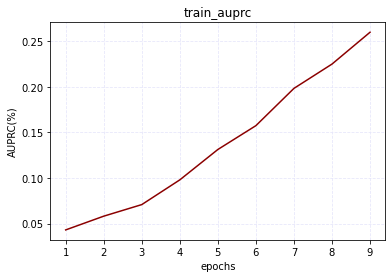

In [ ]:
# 도화지 생성
fig = plt.figure()
# 정확도 그래프 그리기
plt.plot(x, train_auprc_log, label='train_auprc', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('AUPRC(%)')
plt.title('train_auprc')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()

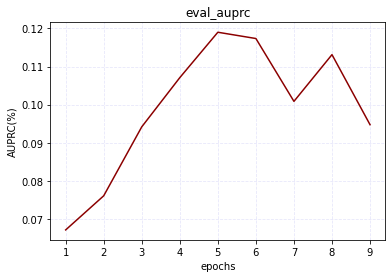

In [ ]:
plt.plot(x, eval_auprc_log, label='eval_auprc', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('AUPRC(%)')
plt.title('eval_auprc')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()